In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
incomes = pd.read_excel('table1.xlsx')
incomes.head()

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38


In [242]:
currencies = pd.read_excel('table2.xlsx')
currencies.head()

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07


In [9]:
incomes['operation_date'] = pd.to_datetime(incomes['operation_date'])
incomes

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38
...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21


In [19]:
#Выведем максимальный размер пополнения в долларах за неделю, начинающуся с 8 февраля
incomes['operation_day'] = incomes['operation_date'].dt.floor('d')
incomes

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


array([[<Axes: title={'center': 'operation_day'}>]], dtype=object)

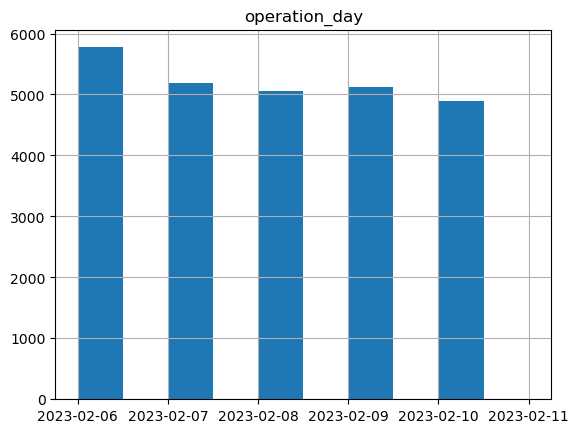

In [21]:
incomes.hist('operation_day')

In [57]:
#ВЫВЕСТИ МАКСИМАЛЬНОЕ ЗНАЧЕНИЕ ПОПОЛНЕНИЯ В ДОЛЛАРАХ С 8 ФЕВРАЛЯ
incomes[(incomes['operation_day'] >= pd.Timestamp("2023-02-08")) & (incomes['currency'] == 'USD')]['volume'].max()

1800000.0

In [89]:
#ВЫВЕСТИ СРЕДНИЙ РАЗМЕР ПОПОЛНЕНИЙ ЗА ФЕВРАЛЬ ПОДНЕВНО, В РАЗБИВКЕ ПО ВАЛЮТАМ
incomes.groupby(['operation_day', 'currency'])['volume'].mean().reset_index()

,operation_day,currency,volume
0,2023-02-06,CNY,3.146146e+04
1,2023-02-06,EUR,8.610809e+03
2,2023-02-06,RUR,1.654025e+06
3,2023-02-06,USD,3.749798e+03
4,2023-02-07,CNY,2.457217e+04
5,2023-02-07,EUR,5.059852e+03
6,2023-02-07,RUR,1.567446e+06
7,2023-02-07,USD,5.901608e+03
8,2023-02-08,CNY,8.200014e+04
9,2023-02-08,EUR,3.909435e+03


In [127]:
#ПОСЧИТАТЬ ДОЛЮ КЛИЕНТОВ, У КОТОРЫХ БЫЛИ ПОПОЛНЕНИЯ В НЕСКОЛЬКИХ ВАЛЮТАХ. ОТВЕТ ОКРУГЛИТЬ ДО ДЕСЯТЫХ ПРОЦЕНТА.
#1. Получить всех клиентов, у которых пополнений в 2+ валют
res = incomes.groupby('user_id')['currency'].nunique().reset_index()
sum(res["currency"] > 1)

0.003030051469367425

In [133]:
t = res['user_id'].nunique()
round(sum(res["currency"] > 1) / t * 100,1)

0.3

In [141]:
#ПО КАЖДОМУ КЛИЕНТУ ВЫВЕСТИ ДАТУ ПЕРВОГО ПОПОЛНЕНИЯ, ВАЛЮТУ, СУММУ В РУБЛЯХ(ТЕПЕРЬ ИСПОЛЬЗУЕМ ТАБЛИЦУ CURRENCIES)
#ОТВЕТОМ БУДЕТ ОБЩАЯ СУММА В РУБЛЯХ ПО ВСЕМ КЛИЕНТАМ

In [157]:
# 1. Для каждого клиента находим первое пополнение
res = incomes.groupby('user_id')['operation_date'].min().reset_index().sort_values('user_id')
res.head()

,user_id,operation_date
0,1403,2023-02-07 17:46:13
1,3311,2023-02-08 11:44:09
2,3594,2023-02-09 12:30:52
3,3816,2023-02-06 21:32:23
4,3893,2023-02-07 12:00:34


In [260]:
users_first_income_df = pd.merge(incomes, res, "inner", ['user_id', 'operation_date'])
users_first_income_df

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
24087,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
24088,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
24089,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
24090,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


In [246]:
# 2. JOIN таблиц с пополнениями и курс валют
# ЮАНИ НАДО ПРЕОБРАЗОВАТЬ В КОРРЕКТНЫЕ ЧИСЛА
currencies.loc[currencies['rate_currency'] == 'CNY', 'rate_value'] = currencies.loc[currencies['rate_currency'] == 'CNY', 'rate_value'].apply(lambda x: str(x)[5:7] + '.' + str(x)[:4])

In [262]:
#теперь преобразовываем наш курс валюты в тип FLOAT
currencies['rate_value'] = currencies['rate_value'].astype(float)
currencies

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,10.4217,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,10.3815,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,10.4331,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [288]:
#теперь джойним
#ИНТЕРЕСНО, ЧТО КЛЮЧИ РАЗНЫЕ ЗДЕСЬ (currency и rate_currency соответственно.)
first_incomes_with_rate_values = pd.merge(users_first_income_df, currencies, how="left", left_on=['currency','operation_day'], right_on=(['rate_currency', 'rate_date']))
first_incomes_with_rate_values

,operation_id,user_id,volume,currency,operation_date,operation_day,rate_currency,rate_countercurrency,rate_value,rate_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07,NaN,NaN,NaN,NaT
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06,NaN,NaN,NaN,NaT
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08,USD,RUB,70.8924,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06,USD,RUB,70.3847,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
24087,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10,NaN,NaN,NaN,NaT
24088,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07,USD,RUB,70.5991,2023-02-07
24089,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09,NaN,NaN,NaN,NaT
24090,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08,NaN,NaN,NaN,NaT


In [294]:
first_incomes_with_rate_values['rate_value'] = first_incomes_with_rate_values['rate_value'].fillna(1.0)

In [290]:
# 3. Вывод в рублях

In [296]:
sum(first_incomes_with_rate_values['volume'] * first_incomes_with_rate_values['rate_value'])

26114821150.3513

In [311]:
#ПОСЧИТАТЬ ПО КАЖДОМУ КЛИЕНТУ СРЕДНЮЮ РАЗНИЦУ В ДНЯХ МЕЖДУ ЕГО ПОПОЛНЕНИЯМ, ВЫВЕСТИ МЕДИАННОЕ ЗНАЧЕНИЕ ПО ВСЕМ КЛИЕНТАМ
incomes_sorted = incomes.sort_values('operation_date')
incomes_sorted

,operation_id,user_id,volume,currency,operation_date,operation_day
8630,3489896,122549688,750000.0,RUR,2023-02-06 00:01:20,2023-02-06
11810,3501136,22398728,3800.0,EUR,2023-02-06 00:01:20,2023-02-06
10827,3486589,30427514,200000.0,RUR,2023-02-06 00:01:20,2023-02-06
4175,1739350,119658472,2000.0,EUR,2023-02-06 00:01:20,2023-02-06
22682,5290016,40169055,7500.0,USD,2023-02-06 00:01:20,2023-02-06
...,...,...,...,...,...,...
10119,3492257,190792,3000.0,USD,2023-02-10 23:54:36,2023-02-10
3009,2318569,30232138,540000.0,RUR,2023-02-10 23:54:36,2023-02-10
21803,3522585,59882504,3000.0,USD,2023-02-10 23:54:36,2023-02-10
17061,5277224,60365748,2900000.0,RUR,2023-02-11 22:52:18,2023-02-11


In [325]:
incomes_sorted['prev'] = incomes_sorted.groupby('user_id')['operation_date'].shift(1)
incomes_sorted

,operation_id,user_id,volume,currency,operation_date,operation_day,prev
8630,3489896,122549688,750000.0,RUR,2023-02-06 00:01:20,2023-02-06,NaT
11810,3501136,22398728,3800.0,EUR,2023-02-06 00:01:20,2023-02-06,NaT
10827,3486589,30427514,200000.0,RUR,2023-02-06 00:01:20,2023-02-06,NaT
4175,1739350,119658472,2000.0,EUR,2023-02-06 00:01:20,2023-02-06,NaT
22682,5290016,40169055,7500.0,USD,2023-02-06 00:01:20,2023-02-06,NaT
...,...,...,...,...,...,...,...
10119,3492257,190792,3000.0,USD,2023-02-10 23:54:36,2023-02-10,NaT
3009,2318569,30232138,540000.0,RUR,2023-02-10 23:54:36,2023-02-10,NaT
21803,3522585,59882504,3000.0,USD,2023-02-10 23:54:36,2023-02-10,NaT
17061,5277224,60365748,2900000.0,RUR,2023-02-11 22:52:18,2023-02-11,NaT


In [355]:
incomes_with_prev = incomes_sorted.loc[~incomes_sorted['prev'].isnull()]
incomes_with_prev['delta'] = incomes_with_prev['operation_date'] - incomes_with_prev['prev']
incomes_with_prev_delta = incomes_with_prev.groupby('user_id')['delta'].mean().reset_index()
incomes_with_prev_delta

C:\Users\maxim\AppData\Local\Temp\ipykernel_2284\1043754898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomes_with_prev['delta'] = incomes_with_prev['operation_date'] - incomes_with_prev['prev']


,user_id,delta
0,13027,2 days 00:01:46
1,38439,1 days 15:54:56
2,46330,2 days 03:16:49
3,50918,3 days 00:21:47
4,84281,0 days 04:39:09
...,...,...
1634,122665840,3 days 21:30:40
1635,122749808,2 days 19:35:37
1636,122998292,0 days 00:54:18
1637,123024856,1 days 04:24:55


In [361]:
incomes_with_prev_delta['delta'].dt.days
#или добавим новый столбец
incomes_with_prev_delta['days'] = incomes_with_prev_delta['delta'].dt.days
incomes_with_prev_delta

,user_id,delta,days
0,13027,2 days 00:01:46,2
1,38439,1 days 15:54:56,1
2,46330,2 days 03:16:49,2
3,50918,3 days 00:21:47,3
4,84281,0 days 04:39:09,0
...,...,...,...
1634,122665840,3 days 21:30:40,3
1635,122749808,2 days 19:35:37,2
1636,122998292,0 days 00:54:18,0
1637,123024856,1 days 04:24:55,1


In [367]:
incomes_with_prev_delta['days'].median()

1.0